<a href="https://colab.research.google.com/github/gadilshina-ve/BDP_MGPU/blob/main/Lab_work_4/rezult_2_Diana_Wynne_Jones__Howl_s_Moving_Castle/Gadilshina_2_DB_MapReduce_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Работа с данными студента**

In [139]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [140]:
# проверка каталога
!ls sample_data

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [141]:
#удаление дубликатов
!rm 100.txt

rm: cannot remove '100.txt': No such file or directory


In [142]:
#загрузка текстов студента в среду
from google.colab import files
uploaded = files.upload()

Saving 100.txt to 100.txt


In [146]:
#объединение  текстов студента в один массив данных

first = True
with open('stud2.txt', 'wt', encoding='utf8') as out:
  all_data = ''.join([open('{}.txt'.format(i), encoding='utf8').read() for i in range(100, 101)]) #
  for line in all_data.split('\n'):
    print(line)
    if 'next' in line:
                         if not first:
                            line = line.replace('next', '')
                         else:
                            first = False
    out.write(line + '\n')


LITRU.RU - Электронная Библиотека

Название книги: Howl’s Moving Castle
Автор(ы): Джонс Диана Винни 
Жанр: Детская фантастика
Адрес книги: http://www.litru.ru/?book=49853&description=1

Аннотация: In the land of Ingary, such things as spells, invisible cloaks, and seven-league boots were everyday things. The Witch of the Waste was another matter.
 After fifty years of quiet, it was rumored that the Witch was about to terrorize the country again. So when a moving black castle, blowing dark smoke from its four thin turrets, appeared on the horizon, everyone thought it was the Witch. The castle, however, belonged to Wizard Howl, who, it was said, liked to suck the souls of young girls.
 The Hatter sisters–Sophie, Lettie, and Martha–and all the other girls were warned not to venture into the streets alone. But that was only the beginning.
 In this giant jigsaw puzzle of a fantasy, people and things are never quite what they seem. Destinies are intertwined, identities exchanged, lovers con

In [147]:
filename = 'stud2.txt'
file = open(filename, 'rt')
text1 = file.read()
file.close()
#print(text1)

#убираем гиперсылки
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

#print(remove_urls(text1))
text=remove_urls(text1)
text2=remove_urls(text1)

#Очистка текста Lowering the case, removing punctuations and numbers

#text_clean = text.replace('-', ' ') #replacing hyphens with whitespace
text_clean = text.replace('.', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('’', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(')', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('(', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\n', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x92', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x94', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x86', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('№', '') #replacing hyphens with whitespace \t «
text_clean = text_clean.replace('–', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\t', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('«', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(':', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(';', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('*', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('•', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('#', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('»', '') #replacing hyphens with whitespace —
text_clean = text_clean.replace('—', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\xa0', ' ') #replacing hyphens with whitespace

table=str.maketrans('','',string.punctuation)
text_clean = text_clean.translate(table)

#removing numbers
text_clean = re.sub(r'\d', '', text_clean)

text_lower = text_clean.lower() #lowercasing
#len(text_lower)

text_lower2=text_lower.split(' ')
text_lower2

['',
 'litru',
 'ru',
 '',
 'электронная',
 'библиотека',
 '',
 'название',
 'книги',
 'howls',
 'moving',
 'castle',
 'авторы',
 'джонс',
 'диана',
 'винни',
 '',
 'жанр',
 'детская',
 'фантастика',
 'адрес',
 'книги',
 '',
 '',
 'аннотация',
 'in',
 'the',
 'land',
 'of',
 'ingary',
 'such',
 'things',
 'as',
 'spells',
 'invisible',
 'cloaks',
 'and',
 'sevenleague',
 'boots',
 'were',
 'everyday',
 'things',
 '',
 'the',
 'witch',
 'of',
 'the',
 'waste',
 'was',
 'another',
 'matter',
 '',
 '',
 'after',
 'fifty',
 'years',
 'of',
 'quiet',
 'it',
 'was',
 'rumored',
 'that',
 'the',
 'witch',
 'was',
 'about',
 'to',
 'terrorize',
 'the',
 'country',
 'again',
 '',
 'so',
 'when',
 'a',
 'moving',
 'black',
 'castle',
 'blowing',
 'dark',
 'smoke',
 'from',
 'its',
 'four',
 'thin',
 'turrets',
 'appeared',
 'on',
 'the',
 'horizon',
 'everyone',
 'thought',
 'it',
 'was',
 'the',
 'witch',
 '',
 'the',
 'castle',
 'however',
 'belonged',
 'to',
 'wizard',
 'howl',
 'who',
 'it',

In [148]:
len(text_lower2)

83640

In [149]:
#Токенизация текста
spec_chars = string.punctuation + '\n\xa0«»\t'
text_test = " ".join([ch for ch in text_lower2 if ch not in spec_chars])
#text_test

text_tokens = word_tokenize(text_test)
#text_tokens
#from nltk import word_tokenize
#nltk.download('punkt')
#sentences = [word.lower() for word in text_lower2 if re.match('^[а-яА-ЯёЁ]+', word)]

dftt = pd.DataFrame(text_tokens, columns=['Words'])
dftt = dftt.dropna(subset=['Words'])
#dftt
sentences=dftt['Words'].values.tolist()
text_tokens

['litru',
 'ru',
 'электронная',
 'библиотека',
 'название',
 'книги',
 'howls',
 'moving',
 'castle',
 'авторы',
 'джонс',
 'диана',
 'винни',
 'жанр',
 'детская',
 'фантастика',
 'адрес',
 'книги',
 'аннотация',
 'in',
 'the',
 'land',
 'of',
 'ingary',
 'such',
 'things',
 'as',
 'spells',
 'invisible',
 'cloaks',
 'and',
 'sevenleague',
 'boots',
 'were',
 'everyday',
 'things',
 'the',
 'witch',
 'of',
 'the',
 'waste',
 'was',
 'another',
 'matter',
 'after',
 'fifty',
 'years',
 'of',
 'quiet',
 'it',
 'was',
 'rumored',
 'that',
 'the',
 'witch',
 'was',
 'about',
 'to',
 'terrorize',
 'the',
 'country',
 'again',
 'so',
 'when',
 'a',
 'moving',
 'black',
 'castle',
 'blowing',
 'dark',
 'smoke',
 'from',
 'its',
 'four',
 'thin',
 'turrets',
 'appeared',
 'on',
 'the',
 'horizon',
 'everyone',
 'thought',
 'it',
 'was',
 'the',
 'witch',
 'the',
 'castle',
 'however',
 'belonged',
 'to',
 'wizard',
 'howl',
 'who',
 'it',
 'was',
 'said',
 'liked',
 'to',
 'suck',
 'the',
 's

In [151]:
from google.colab import files
with pd.ExcelWriter('allstudentWords_2.xlsx') as writer:
    dftt.to_excel(writer, sheet_name='stud2')
files.download('allstudentWords_2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Лемматизация данных

In [152]:
!pip install pymorphy2

In [153]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

words = sentences
normal_text=[]
for word in words:
    p = morph.parse(word)[0]
    normal_text.append(p.normal_form)
    #print(p.normal_form)
normal_text

['litru',
 'ru',
 'электронный',
 'библиотека',
 'название',
 'книга',
 'howls',
 'moving',
 'castle',
 'автор',
 'джонс',
 'диана',
 'винни',
 'жанр',
 'детский',
 'фантастика',
 'адрес',
 'книга',
 'аннотация',
 'in',
 'the',
 'land',
 'of',
 'ingary',
 'such',
 'things',
 'as',
 'spells',
 'invisible',
 'cloaks',
 'and',
 'sevenleague',
 'boots',
 'were',
 'everyday',
 'things',
 'the',
 'witch',
 'of',
 'the',
 'waste',
 'was',
 'another',
 'matter',
 'after',
 'fifty',
 'years',
 'of',
 'quiet',
 'it',
 'was',
 'rumored',
 'that',
 'the',
 'witch',
 'was',
 'about',
 'to',
 'terrorize',
 'the',
 'country',
 'again',
 'so',
 'when',
 'a',
 'moving',
 'black',
 'castle',
 'blowing',
 'dark',
 'smoke',
 'from',
 'its',
 'four',
 'thin',
 'turrets',
 'appeared',
 'on',
 'the',
 'horizon',
 'everyone',
 'thought',
 'it',
 'was',
 'the',
 'witch',
 'the',
 'castle',
 'however',
 'belonged',
 'to',
 'wizard',
 'howl',
 'who',
 'it',
 'was',
 'said',
 'liked',
 'to',
 'suck',
 'the',
 'so

In [154]:
#Очистка данных от стоп-слов

#убираем все лишние слова

shortest_word_len = 2

result = [s for s in normal_text if len(s) > shortest_word_len]
text_lower2=result
map11 = []
map22 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in text_lower2:
    if words[0][0] in a_to_m:
        map11.append(words)
    else:
        map22.append(words)
text_lower2=map11
#len(text_lower2)

text_lower=" ".join(map(str, text_lower2))
#len(text_lower)

#Data Partition
#Seperating the first 5000 lines and next in two seperate data frames

text1 = text_lower[:5000]
text2 = text_lower[5000:]

#Mapper
#Mapper 1
def mapper1(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Mapper 2
def mapper2(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Making lists of the seperate data

# Подготовка данных к частотной токенизации, разбиение данных на равное количество символов

Mapping words from first 5000 lines using mapper 1 in list 1

In [155]:
list1 = []
for x in mapper1(text1):
    list1.append(x)

Mapping words from rest of the lines using mapper 2 in list 2

In [156]:
list2 = []
for x in mapper2(text2):
    list2.append(x)

In [157]:
print(list1)

[('litru', 1), ('электронный', 1), ('библиотека', 1), ('название', 1), ('книга', 1), ('howls', 1), ('moving', 1), ('castle', 1), ('автор', 1), ('джонс', 1), ('диана', 1), ('винни', 1), ('жанр', 1), ('детский', 1), ('фантастика', 1), ('адрес', 1), ('книга', 1), ('аннотация', 1), ('the', 1), ('land', 1), ('ingary', 1), ('such', 1), ('things', 1), ('spells', 1), ('invisible', 1), ('cloaks', 1), ('and', 1), ('sevenleague', 1), ('boots', 1), ('were', 1), ('everyday', 1), ('things', 1), ('the', 1), ('witch', 1), ('the', 1), ('waste', 1), ('was', 1), ('another', 1), ('matter', 1), ('after', 1), ('fifty', 1), ('years', 1), ('quiet', 1), ('was', 1), ('rumored', 1), ('that', 1), ('the', 1), ('witch', 1), ('was', 1), ('about', 1), ('terrorize', 1), ('the', 1), ('country', 1), ('again', 1), ('when', 1), ('moving', 1), ('black', 1), ('castle', 1), ('blowing', 1), ('dark', 1), ('smoke', 1), ('from', 1), ('its', 1), ('four', 1), ('thin', 1), ('turrets', 1), ('appeared', 1), ('the', 1), ('horizon', 1)

In [158]:
print(list2)

[('ce', 1), ('them', 1), ('they', 1), ('wondered', 1), ('what', 1), ('use', 1), ('wizard', 1), ('howl', 1), ('found', 1), ('for', 1), ('all', 1), ('the', 1), ('souls', 1), ('collected', 1), ('they', 1), ('had', 1), ('other', 1), ('things', 1), ('their', 1), ('minds', 1), ('before', 1), ('long', 1), ('however', 1), ('for', 1), ('hatter', 1), ('had', 1), ('died', 1), ('suddenly', 1), ('just', 1), ('sophie', 1), ('was', 1), ('old', 1), ('enough', 1), ('leave', 1), ('school', 1), ('for', 1), ('good', 1), ('then', 1), ('appeared', 1), ('that', 1), ('hatter', 1), ('had', 1), ('been', 1), ('altogether', 1), ('too', 1), ('proud', 1), ('his', 1), ('daughters', 1), ('the', 1), ('school', 1), ('fees', 1), ('had', 1), ('been', 1), ('paying', 1), ('had', 1), ('left', 1), ('the', 1), ('shop', 1), ('with', 1), ('quite', 1), ('heavy', 1), ('debts', 1), ('when', 1), ('the', 1), ('funeral', 1), ('was', 1), ('over', 1), ('fanny', 1), ('sat', 1), ('down', 1), ('the', 1), ('parlor', 1), ('the', 1), ('house

Merging the two lists

In [159]:
final_list = list1+list2

# Sorting

Sorting the list alphabetically in ascending order

In [160]:
final_list.sort()

In [161]:
len(final_list)

61795

In [162]:
final_list[0]

('aback', 1)

In [163]:
del final_list[0]

# Partition of data before sending to reducer

Storing elements in final_list into two different lists: a-m in map1 and n-z in map2


In [164]:
#storing elements in final_list into two different lists: a-m in map1 and n-z in map2
map1 = []
map2 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in final_list:
    if words[0][0] in a_to_m:
        map1.append(words)
    else:
        map2.append(words)

In [165]:
len(map1)

61794

In [166]:
len(map2)

0

In [168]:
print(map1)

[('aback', 1), ('abate', 1), ('abilities', 1), ('ability', 1), ('abject', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('able', 1), ('abolish', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 1), ('about', 

In [37]:
print(map2)

[]


# Reducer

Defining the reducer function

In [169]:
def reducer(word, counts):
    yield(word, sum(counts))

Reducer 1          
Preparing and feeding the data into the reducer function

In [170]:
def reduce1(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducer2  
Preparing and feeding the data into the reducer function

In [171]:
def reduce2(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducing the first a-m list

In [172]:
list3 = reduce1(map1)

Reducing the second n-z list

In [173]:
list4 = reduce2(map2)

Merging the two reduced lists

In [174]:
answer_list = list3 + list4
print(answer_list)

[('aback', 1), ('abate', 1), ('abilities', 1), ('ability', 1), ('abject', 1), ('able', 14), ('abolish', 1), ('about', 217), ('above', 22), ('absently', 2), ('absentminded', 1), ('absolutely', 1), ('absorbed', 1), ('abstractedly', 1), ('absurd', 1), ('accepted', 1), ('accepting', 1), ('accidents', 1), ('accord', 1), ('accost', 1), ('accosted', 1), ('accosting', 1), ('account', 1), ('accounts', 3), ('accused', 1), ('accusingly', 3), ('ace', 1), ('ache', 2), ('ached', 3), ('aches', 5), ('aching', 3), ('acing', 1), ('acquired', 1), ('across', 46), ('act', 2), ('acted', 1), ('action', 1), ('activity', 1), ('actually', 9), ('add', 2), ('added', 15), ('addressed', 1), ('addressing', 1), ('admire', 2), ('admired', 1), ('admirers', 1), ('admiringly', 2), ('admit', 9), ('admitted', 4), ('ado', 1), ('adoring', 1), ('advance', 3), ('advanced', 6), ('advantages', 1), ('advice', 3), ('advise', 1), ('affected', 1), ('affinity', 1), ('afford', 1), ('afraid', 13), ('after', 113), ('afternoon', 6), ('af

# Final Dataframe

In [175]:
df = pd.DataFrame(answer_list, columns=['Word', 'Frequency'])
df

,Word,Frequency
0,aback,1
1,abate,1
2,abilities,1
3,ability,1
4,abject,1
...,...,...
5884,жанр,1
5885,книга,2
5886,название,1
5887,фантастика,1


In [176]:
print(df.to_string())

                     Word  Frequency
0                   aback          1
1                   abate          1
2               abilities          1
3                 ability          1
4                  abject          1
5                    able         14
6                 abolish          1
7                   about        217
8                   above         22
9                absently          2
10           absentminded          1
11             absolutely          1
12               absorbed          1
13           abstractedly          1
14                 absurd          1
15               accepted          1
16              accepting          1
17              accidents          1
18                 accord          1
19                 accost          1
20               accosted          1
21              accosting          1
22                account          1
23               accounts          3
24                accused          1
25             accusingly          3
2

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5889 entries, 0 to 5888
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       5889 non-null   object
 1   Frequency  5889 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 92.1+ KB


In [178]:
df1=df[['Word','Frequency']].sort_values(ascending=False,by='Frequency')
df1

,Word,Frequency
5110,the,4095
114,and,2292
4350,she,1437
5578,was,1388
4633,sophie,1247
...,...,...
2678,juggled,1
2679,jugs,1
2683,june,1
2686,justinor,1


# EN

In [179]:
!rm stop-words_en.xlsx

In [180]:
#убираем слова-стоп загружаем слова-стоп и сравниваем с корпусом
from google.colab import files
uploaded = files.upload()

Saving stop-words_en.xlsx to stop-words_en.xlsx


In [181]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

Unnamed: 0    179
0             179
dtype: int64


In [182]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_en'}, inplace=True)
print(df_stop.count())
#убираем слова-стоп
df_student=df1.copy()
df_student_clear=df_student[~df_student.Word.isin(df_stop.stop_en)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_101'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

Unnamed: 0    179
stop_en       179
dtype: int64
     WordStudent_101  Frequency
0             sophie       1247
1               said        972
2               howl        777
3            michael        476
4           calcifer        314
...              ...        ...
5787         dumping          1
5788         dutiful          1
5789        dwindled          1
5790           eager          1
5791     электронный          1

[5792 rows x 2 columns]
WordStudent_101    5792
Frequency          5792
dtype: int64


# RU

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
df_stop= pd.read_excel("stop-words-ru+.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

In [ ]:
df_student=df_student_clear2
df_student_clear=df_student[~df_student.WordStudent_5.isin(df_stop.stop_ru)].reset_index(drop=True)
#df_student_clear.rename(columns = {'Word':'WordStudent_1'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

# PLOT

<ipython-input-183-cd2c26dcdc2b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_101'],rotation=75)


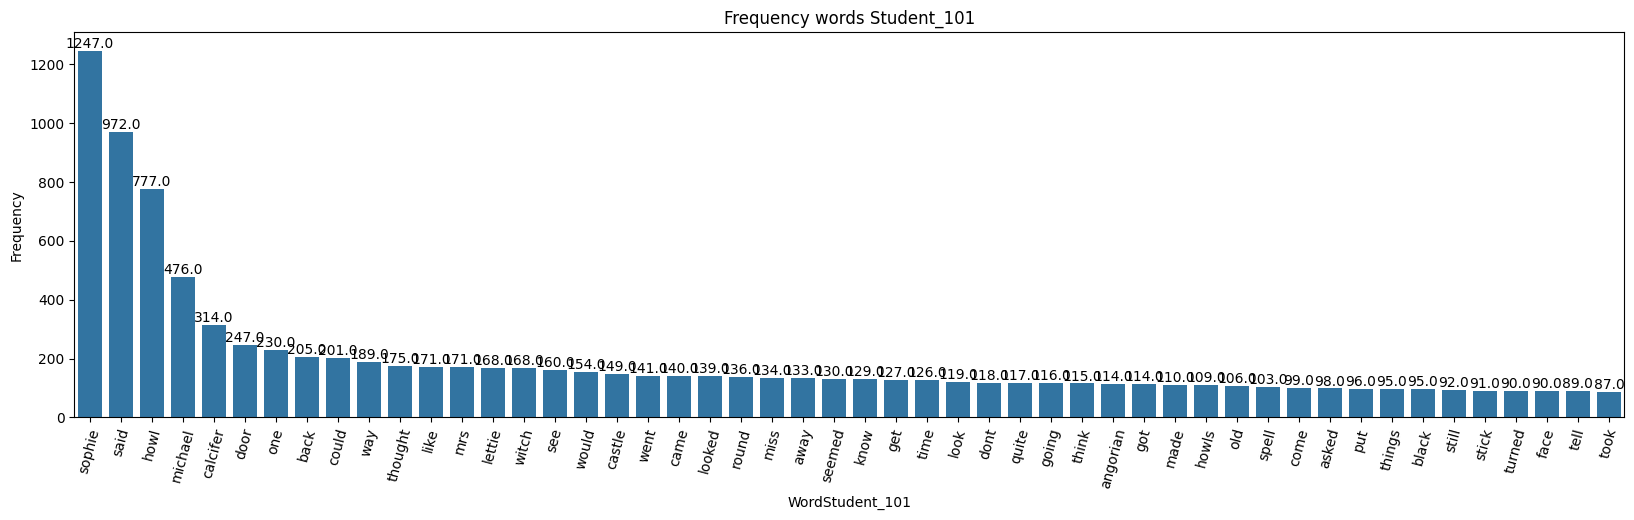

In [183]:
#Plotting the top 5 words by revenue
#setting the figure size
plt.figure(figsize=(20,5))
#creating a bar plot
ax=sns.barplot(x='WordStudent_101',y='Frequency',data=df_student_clear2.head(50))
#rotating the x axis labels
ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_101'],rotation=75)
#setting the title
ax.set_title("Frequency words Student_101")
#setting the Y-axis labels
ax.set_ylabel("Frequency")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

In [185]:
from google.colab import files
with pd.ExcelWriter('outputStudents_2.xlsx') as writer:
    df_student_clear2.to_excel(writer, sheet_name='outputStudent_101')
files.download('outputStudents_2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
!ls

 100.txt		  outputStudents_2.xlsx		    stop-words_en.xlsx
 90.txt			 'outputTeacherW_Reduce (1).xlsx'   stud1.txt
 allstudentWords_1.xlsx   outputTeacherW_Reduce.xlsx	    stud2.txt
 allstudentWords_2.xlsx   rezult_1.xlsx			    stud.txt
 allstudentWords.xlsx	  rezult.xlsx
 outputStudents_1.xlsx	  sample_data


# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [187]:
!rm Analise_Gadilshina_2.xlsx

rm: cannot remove 'Analise_Gadilshina_2.xlsx': No such file or directory


In [188]:
from google.colab import files
uploaded = files.upload()

Saving outputTeacherW_Reduce.xlsx to outputTeacherW_Reduce (2).xlsx


In [189]:
df_teach = pd.read_excel("outputTeacherW_Reduce.xlsx", 'TeacerWords')
df_teach
print(df_teach.count())

Unnamed: 0      428
KorpusZakova    428
Frequency       428
dtype: int64


In [190]:
df_stud = pd.read_excel("outputStudents_2.xlsx", 'outputStudent_101')
#print(df_stud)
print(df_stud.count())

Unnamed: 0         5792
WordStudent_101    5792
Frequency          5792
dtype: int64


In [193]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_101.isin(df_teach.KorpusZakova)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_101':'WordSt_101Tch'}, inplace = True)
df_student_ok.rename(columns = {'Frequency':'FrSt_101'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_101Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

     Unnamed: 0 WordSt_101Tch  FrSt_101
0           821          year         9
1          4907       written         1
2           978       writing         7
3          1346         write         5
4           439        worked        16
..          ...           ...       ...
222        1129         agree         6
223         993           age         7
224        3613        afford         1
225        3513      activity         1
226         525          able        14

[227 rows x 3 columns]
Unnamed: 0       227
WordSt_101Tch    227
FrSt_101         227
dtype: int64


In [194]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusZakova.isin(df_stud.WordStudent_101)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusZakova':'WordSt_101Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
#df_teach_ok.pop('Unnamed: 0')
print(df_teach_ok.sort_values(by ='WordSt_101Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

     Unnamed: 0 WordSt_101Tch  FrTch
0           101          year      2
1           103       written      2
2            92       writing      2
3             9         write      9
4           299        worked      1
..          ...           ...    ...
222         209         agree      1
223         208           age      1
224         206        afford      1
225          25      activity      4
226          86          able      2

[227 rows x 3 columns]
Unnamed: 0       227
WordSt_101Tch    227
FrTch            227
dtype: int64


In [195]:
df_teach_ok_1=df_teach_ok
df_teach_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_teach_ok_1

,WordSt_101Tch,FrTch
0,lesson,16
1,main,13
2,method,11
3,notes,10
4,time,10
...,...,...
222,ready,1
223,real,1
224,talked,1
225,talk,1


In [196]:
df_student_ok_1=df_student_ok
df_student_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_student_ok_1

,WordSt_101Tch,FrSt_101
0,one,230
1,back,205
2,could,201
3,way,189
4,like,171
...,...,...
222,divided,1
223,university,1
224,task,1
225,deception,1


In [207]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res.head(50)

,WordSt_101Tch,FrTch,FrSt_101
0,lesson,16,2
1,main,13,7
2,method,11,2
3,notes,10,6
4,time,10,126
5,learning,9,2
6,write,9,5
7,paper,6,28
8,look,6,119
9,show,6,17


In [208]:
#Объединяем частоты студента и преподавателя
res = df_student_ok.merge(df_teach_ok)
res

,WordSt_101Tch,FrSt_101,FrTch
0,one,230,4
1,back,205,1
2,could,201,3
3,way,189,1
4,like,171,5
...,...,...,...
222,divided,1,1
223,university,1,1
224,task,1,5
225,deception,1,1


In [199]:
from google.colab import files
with pd.ExcelWriter('rezult_2.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult_2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

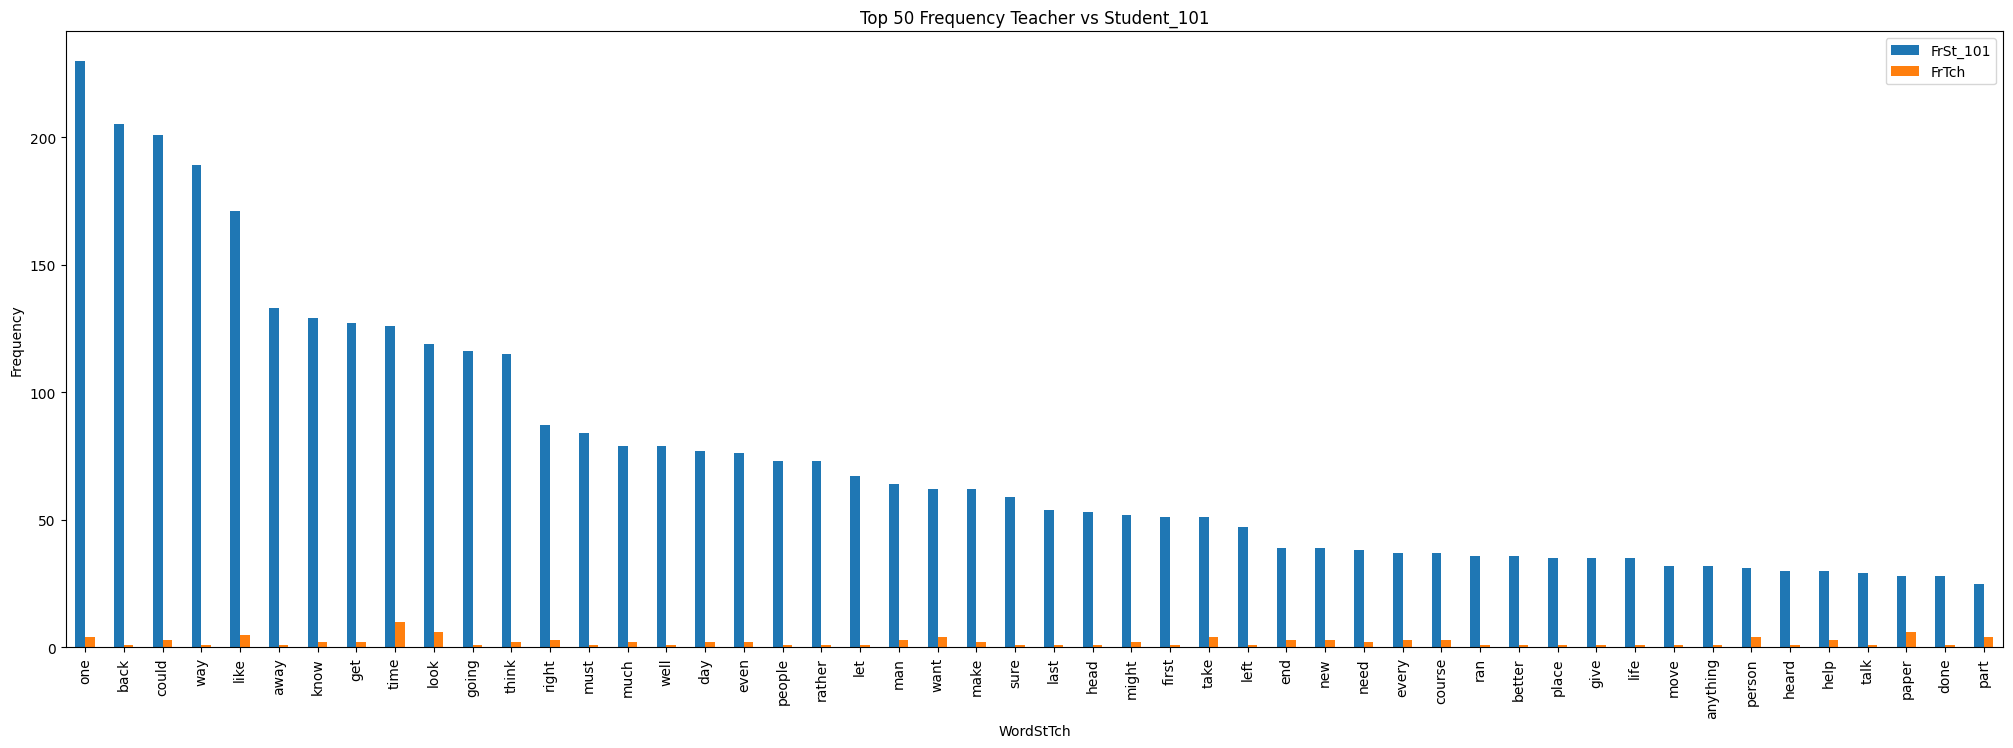

In [210]:
# Выбираем только первые 50 значений из столбца 'WordSt_101Tch'
x = res['WordSt_101Tch'].head(50).values.tolist()
res.head(50).plot(kind='bar', figsize=(25, 8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Top 50 Frequency Teacher vs Student_101")
plt.xticks(x_pos, x)
plt.show()

In [211]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

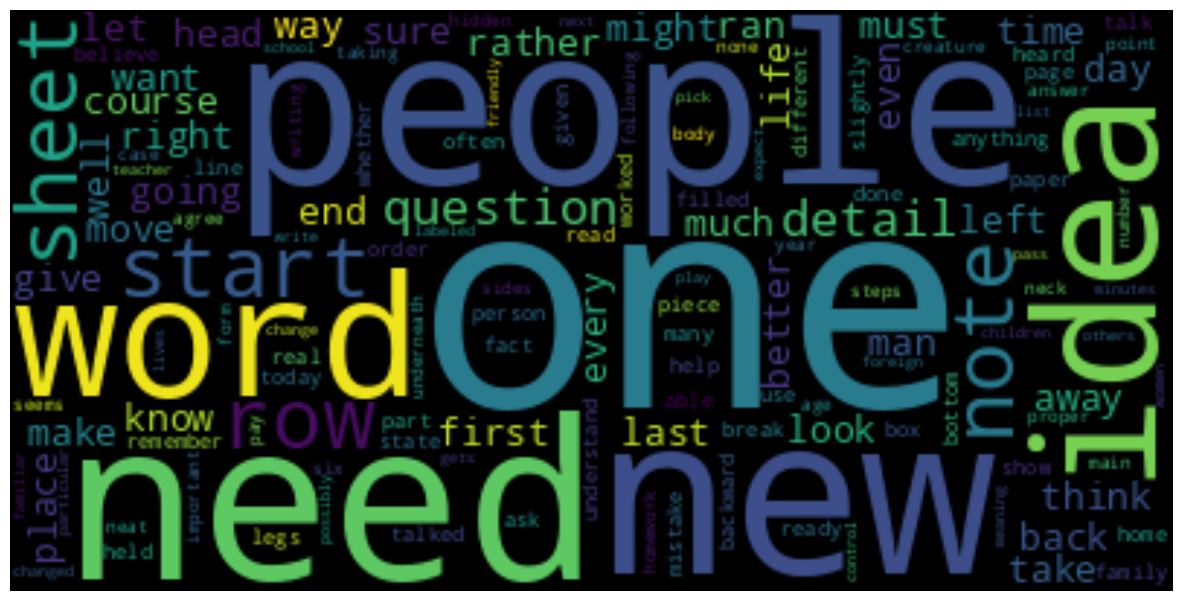

In [212]:
viz=res['WordSt_101Tch'].values.tolist()
text_raw = " ".join(viz)
wordcloud = WordCloud().generate(text_raw)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")